In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from typing import List, Tuple

from src.read_data import plot_image, describe_scanpaths, collect_scanpaths
from os.path import join
from typing import Callable, Dict, List

In [2]:
DATA_PATH = join("TrainingDataset", "TrainingData")
ASD_PATH  = join(DATA_PATH, "ASD")
TD_PATH   = join(DATA_PATH, "TD")

ADDITIONAL_PATH = join("TrainingDataset", "AdditionalData")
META_PATH = join(ADDITIONAL_PATH, "ImageAnnotations.csv")

## Фильтрация данных

Возьмем картинки, для которых минимум хотя бы 3 фиксации.

In [3]:
info = describe_scanpaths(ASD_PATH, TD_PATH)

In [4]:
info

,file_name,image_id,is_asd,min,median,max,n_participants
0,ASD_scanpath_32.txt,32,True,2,11.5,19,12
1,ASD_scanpath_206.txt,206,True,1,7.0,10,13
2,ASD_scanpath_296.txt,296,True,1,8.0,12,13
3,ASD_scanpath_240.txt,240,True,4,8.5,13,8
4,ASD_scanpath_210.txt,210,True,1,8.5,12,12
...,...,...,...,...,...,...,...
595,TD_scanpath_151.txt,151,False,2,7.0,17,12
596,TD_scanpath_201.txt,201,False,4,9.0,16,13
597,TD_scanpath_97.txt,97,False,2,7.0,11,13
598,TD_scanpath_300.txt,300,False,2,9.0,15,13


In [5]:
info["n_participants"].value_counts()

n_participants
14    164
13    162
12    149
11     58
10     33
15     19
9      10
8       2
16      2
17      1
Name: count, dtype: int64

In [6]:
df = info[(info["n_participants"] == 14) & (info["min"] >= 3)]
df

,file_name,image_id,is_asd,min,median,max,n_participants
11,ASD_scanpath_37.txt,37,True,3,11.5,17,14
15,ASD_scanpath_148.txt,148,True,3,6.5,12,14
34,ASD_scanpath_2.txt,2,True,3,10.0,16,14
64,ASD_scanpath_72.txt,72,True,3,13.0,23,14
74,ASD_scanpath_43.txt,43,True,3,8.0,22,14
115,ASD_scanpath_48.txt,48,True,3,11.0,24,14
151,ASD_scanpath_137.txt,137,True,5,6.0,11,14
164,ASD_scanpath_51.txt,51,True,3,9.5,19,14
217,ASD_scanpath_160.txt,160,True,3,7.0,14,14
224,ASD_scanpath_20.txt,20,True,5,10.0,23,14


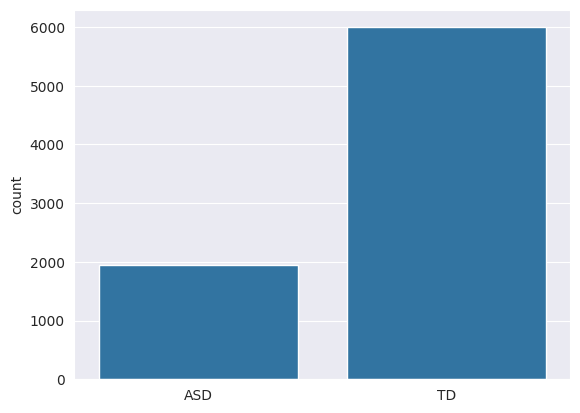

In [93]:
sns.countplot(x=np.where(df["is_asd"].values.astype(int) == 1, "ASD", "TD"), );

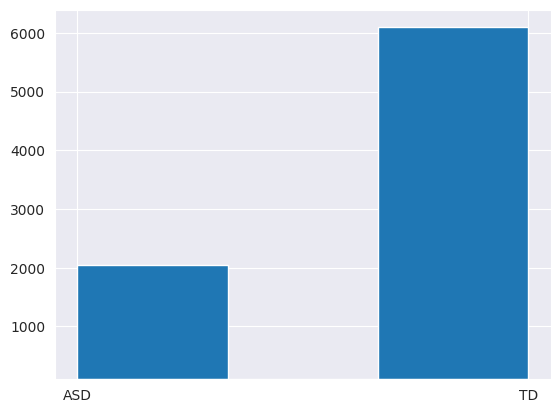

In [87]:
plt.hist(np.where(df["is_asd"].values.astype(int) == 1, "ASD", "TD"), bins=3, bottom=10);

In [8]:
file_names = df["file_name"].values

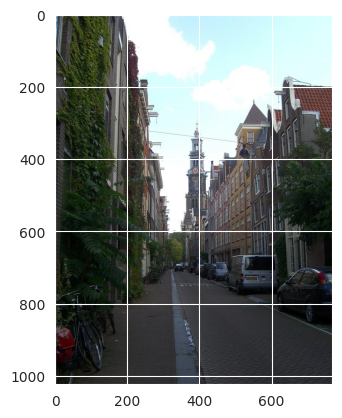

In [9]:
plot_image(file_names[0])

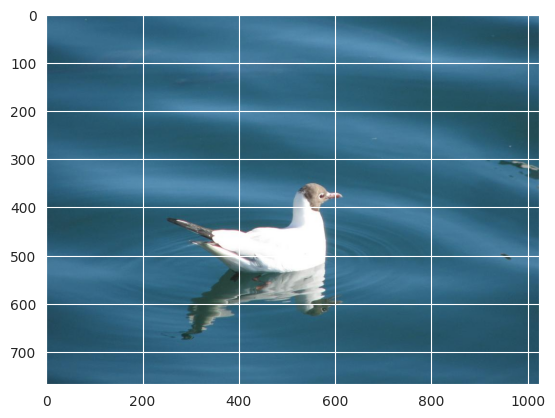

In [10]:
plot_image(file_names[1])

## Сборка датасета

Для итоговых файлов соберем фиксации в одну таблицу, получим формат для `eyefeatures`.<br>
Загрузим метаданные. Большая часть классов имеет малое количество представителей, поэтому похожие по смыслу классы мы объединим.

['face' 'people' 'people background' 'text' 'hand' 'animal' 'plant'
 'people group' 'building' 'object' 'car' 'train' 'ship' 'food' 'plane']


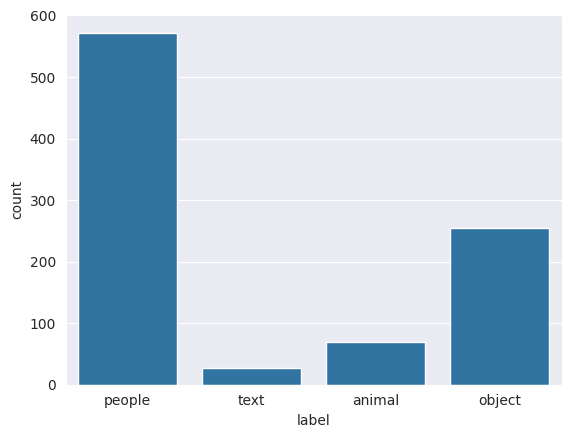

In [95]:
meta_file = pd.read_csv(META_PATH, header=None)
meta_file.rename(columns={meta_file.columns[0]: "file_name", meta_file.columns[-1]: "label"}, inplace=True)
meta_file["file_name"] = meta_file["file_name"].apply(lambda x: int(x.split("/")[-1][:-4]))
print(meta_file["label"].unique())
new_labels = {"people": "people", "face": "people", "people group": "people", "people background": "people", "hand": "people", "text": "text", "animal": "animal", }
for label in meta_file["label"].unique():
    if label not in new_labels.keys():
        new_labels[label] = "object"

meta_file["label"] = meta_file["label"].map(new_labels)

plt.tight_layout()
sns.countplot(x=meta_file["label"]);
# plt.hist(meta_file["label"]);

In [12]:
df = collect_scanpaths(file_names, ASD_PATH, TD_PATH)

meta_file = meta_file.groupby("file_name")["label"].agg(set).reset_index()
df["labels"] = df["image_id"].map(lambda x: meta_file[meta_file["file_name"] == x]["label"].values.squeeze())

df

,fixation_id,x,y,duration,participant_id,image_id,file_name,is_asd,labels
0,0,326,436,92,1,37,ASD_scanpath_37.txt,True,{object}
1,1,473,515,600,1,37,ASD_scanpath_37.txt,True,{object}
2,2,406,711,924,1,37,ASD_scanpath_37.txt,True,{object}
3,3,409,395,192,1,37,ASD_scanpath_37.txt,True,{object}
4,4,400,353,1291,1,37,ASD_scanpath_37.txt,True,{object}
...,...,...,...,...,...,...,...,...,...
7941,2,390,679,316,14,32,TD_scanpath_32.txt,False,{object}
7942,3,441,873,633,14,32,TD_scanpath_32.txt,False,{object}
7943,4,393,781,125,14,32,TD_scanpath_32.txt,False,{object}
7944,5,368,650,333,14,32,TD_scanpath_32.txt,False,{object}


In [13]:
df[["participant_id", "fixation_id"]].groupby(["participant_id"]).count()

,fixation_id
participant_id,
1,590
2,601
3,720
4,514
5,507
6,424
7,642
8,542
9,661


Статистики для каждого участника по всем выбранным картинкам.

In [14]:
df[["participant_id", "image_id", "fixation_id"]].groupby(["participant_id", "image_id"]).count()[["fixation_id"]].groupby(["participant_id"]).aggregate(["min", "median", "max"])

fixation_id           
                       min median max
participant_id                       
1                        3   10.0  23
2                        3   11.0  27
3                        3   12.0  31
4                        3    9.0  25
5                        3    8.0  23
6                        3    7.0  22
7                        3   11.0  26
8                        3   10.0  21
9                        3   12.0  26
10                       3   12.0  23
11                       3   10.0  21
12                       3    7.0  19
13                       4    9.0  23
14                       3    9.0  25

## Similarity Matrix

Напишем пайплайн получения матрицы схожести по входной таблице и дистанции. Итоговый размер составит (n_objects, n_objects), где object - пара (participant_id, image_id). Будем получать similarity из дистанции, считая, что максимум похожести достигается в единице на паре одинаковых объектов.

In [15]:
import eyefeatures.features.scanpath_dist    as eye_dist
import eyefeatures.features.scanpath_complex as eye_complex

def dist2similarity(distance: float) -> float:
    return 1 / distance

def get_similarity_matrix(df: pd.DataFrame, dist_metric: Callable) -> Tuple[List[str], pd.DataFrame]:
    scanpaths_df = df[["participant_id", "image_id", "x", "y"]]
    object_ids, scanpaths = [], []
    for object_id, scanpath_df in scanpaths_df.groupby(["participant_id", "image_id"]):
        object_ids.append(object_id)
        scanpaths.append(scanpath_df[["x", "y"]])
    
    dist_matrix = eye_complex.get_dist_matrix(scanpaths, dist_metric=dist_metric).values
    dist_matrix /= dist_matrix.max()
    n, _ = dist_matrix.shape
    
    sim_matrix  = np.zeros(dist_matrix.shape)
    for i in range(n):
        for j in range(i + 1, n):
            sim_matrix[i, j] = sim_matrix[j, i] = dist2similarity(dist_matrix[i, j])
            
    sim_matrix = sim_matrix / sim_matrix.max() + np.eye(n)
    sim_matrix = pd.DataFrame(index=object_ids, columns=object_ids, data=sim_matrix)
    return sim_matrix

In [16]:
distances = {
    "euc": eye_dist.calc_euc_dist,
    "eye": eye_dist.calc_eye_dist,
    "dtw": eye_dist.calc_dtw_dist,
    "man": eye_dist.calc_man_dist,
    "dfr": eye_dist.calc_dfr_dist
}

Полторы минуты на подсчет всех матриц.

In [17]:
import warnings
similarity_matrices = {}
for dist_name, dist_metric in distances.items():
    print(dist_name)
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        similarity_matrices[dist_name] = get_similarity_matrix(df, dist_metric)

euc


100%|██████████| 798/798 [00:08<00:00, 89.37it/s] 


eye


100%|██████████| 798/798 [00:28<00:00, 28.01it/s]


dtw


100%|██████████| 798/798 [02:20<00:00,  5.67it/s]


man


100%|██████████| 798/798 [00:27<00:00, 28.83it/s]


dfr


100%|██████████| 798/798 [00:25<00:00, 31.15it/s] 


In [18]:
similarity_matrices["dfr"]

,"(1, 2)","(1, 7)","(1, 16)","(1, 17)","(1, 20)","(1, 21)","(1, 27)","(1, 28)","(1, 32)","(1, 37)",...,"(14, 243)","(14, 251)","(14, 258)","(14, 260)","(14, 268)","(14, 274)","(14, 275)","(14, 279)","(14, 280)","(14, 297)"
"(1, 2)",1.000000,0.245074,0.030992,0.021165,0.031826,0.024099,0.050358,0.043857,0.010601,0.006793,...,0.064024,0.157071,0.039998,0.016055,0.069068,0.110330,0.020653,0.039947,0.035684,0.029088
"(1, 7)",0.245074,1.000000,0.028426,0.022172,0.022189,0.017915,0.035056,0.028554,0.008849,0.006478,...,0.046901,0.058271,0.026868,0.014282,0.041197,0.069063,0.017187,0.029752,0.026123,0.025652
"(1, 16)",0.030992,0.028426,1.000000,0.026268,0.027083,0.033500,0.032828,0.031527,0.011118,0.006529,...,0.011570,0.029857,0.033895,0.015542,0.027466,0.027397,0.014416,0.013677,0.021035,0.023249
"(1, 17)",0.021165,0.022172,0.026268,1.000000,0.006710,0.013038,0.011628,0.011085,0.007690,0.007773,...,0.009123,0.014753,0.015335,0.012591,0.018746,0.017284,0.007170,0.008146,0.007624,0.006191
"(1, 20)",0.031826,0.022189,0.027083,0.006710,1.000000,0.046235,0.033669,0.043370,0.034020,0.013740,...,0.030643,0.038094,0.034376,0.033348,0.029537,0.045195,0.035216,0.033261,0.063789,0.038561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(14, 274)",0.110330,0.069063,0.027397,0.017284,0.045195,0.026594,0.069347,0.035224,0.015666,0.008707,...,0.093739,0.072166,0.024004,0.025348,0.036525,1.000000,0.034604,0.078887,0.028797,0.037525
"(14, 275)",0.020653,0.017187,0.014416,0.007170,0.035216,0.019906,0.030271,0.029405,0.035923,0.024066,...,0.034376,0.022720,0.016814,0.046878,0.020242,0.034604,1.000000,0.014138,0.028510,0.022593
"(14, 279)",0.039947,0.029752,0.013677,0.008146,0.033261,0.017107,0.020793,0.015281,0.019804,0.012280,...,0.038110,0.022933,0.011071,0.029251,0.014644,0.078887,0.014138,1.000000,0.012522,0.017158
"(14, 280)",0.035684,0.026123,0.021035,0.007624,0.063789,0.044602,0.100558,0.043838,0.023830,0.020597,...,0.028564,0.041547,0.034596,0.057145,0.035757,0.028797,0.028510,0.012522,1.000000,0.043810


In [19]:
def make_adjacency_from_similarity(similarity_matrix: pd.DataFrame, threshold: float, weighted: bool = True) -> pd.DataFrame:
    assert 0 <= threshold <= 1.0
    n, _ = similarity_matrix.shape
    adjacency_matrix = similarity_matrix.copy()
    adjacency_matrix -= np.eye(n)  # remove loops
    adjacency_matrix[adjacency_matrix < threshold] = 0
    if not weighted:
        adjacency_matrix[adjacency_matrix >= threshold] = 1
    return adjacency_matrix

### Зависимость размера полученного графа от threshold

In [20]:
def get_scaled_size(adjacency_matrix: pd.DataFrame, is_directed: bool = True) -> float:
    V, _ = adjacency_matrix.shape
    size = (adjacency_matrix.values != 0).sum()
    scaled_size = size / (V * (V - 1))
    if not is_directed:
        scaled_size *= 2
    return scaled_size

In [21]:
def plot_graph_size(similarity_matrices: Dict[str, pd.DataFrame], thresholds: List[float]):
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, (dist_name, similarity_matrix) in enumerate(similarity_matrices.items()):
        scaled_sizes = []
        for threshold in thresholds:
            adjacency_matrix = make_adjacency_from_similarity(similarity_matrix, threshold)
            scaled_sizes.append(get_scaled_size(adjacency_matrix))
        sns.lineplot(x=thresholds, y=scaled_sizes, label=dist_name, ax=ax)
        ax.set(xlabel="Thresholds", ylabel="# of Edges (scaled)")

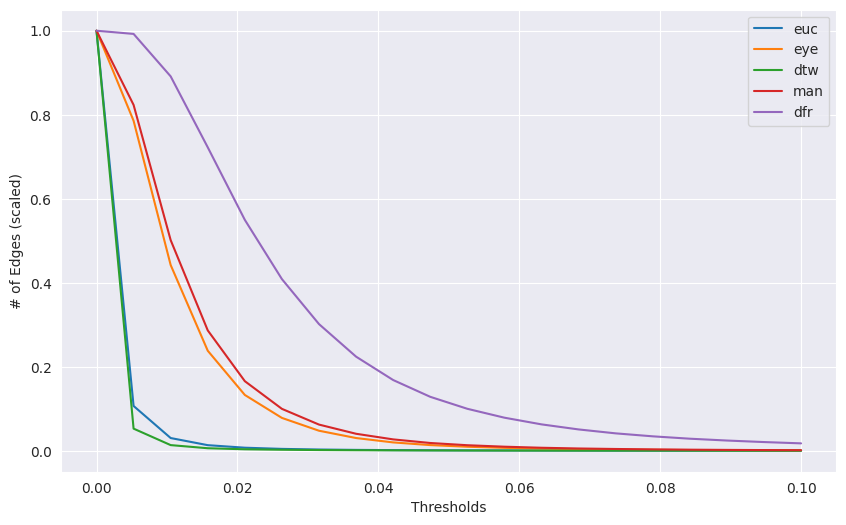

In [22]:
plot_graph_size(similarity_matrices, np.linspace(0, 0.1, 20))

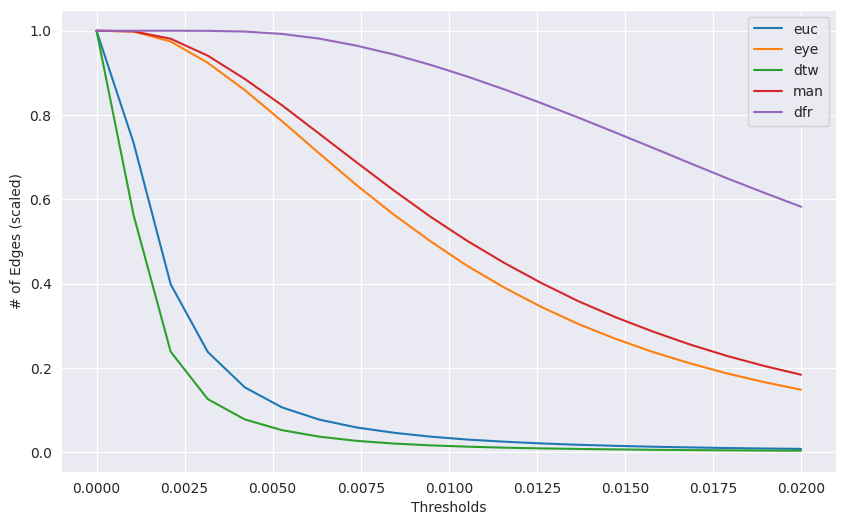

In [23]:
plot_graph_size(similarity_matrices, np.linspace(0, 0.02, 20))

`euc` и `dtw`, `eye` и `man` - ведут себя похоже; для второй пары это очевидно, так как это метрики отличаются взвешиванием, а во второй паре метрики считаются совсем по разному. `dfr` отличается от всех по динамике.

In [24]:
def find_threshold_for_size(similarity_matrix: pd.DataFrame, required_size: float, atol: float = 1e-6, max_iters: int = 20) -> float:
    r = 1.0
    l = 0.0
    best_threshold = -1
    best_diff      = 1
    n_iters        = 0
    while True:
        n_iters += 1
        m = (r + l) / 2
        adjacency_matrix = make_adjacency_from_similarity(similarity_matrix, threshold=m)
        scaled_size = get_scaled_size(adjacency_matrix)
        if scaled_size > required_size:
            l = m
        else:
            r = m
        diff = abs(scaled_size - required_size)
        if diff < best_diff:
            best_diff = diff
            best_threshold = m
        if best_diff < atol or n_iters >= max_iters:
            break
    return best_threshold

In [25]:
def check_binary_search(dist_name: str = "euc", required_size: float = 0.5):
    sm               = similarity_matrices[dist_name]
    threshold        = find_threshold_for_size(sm, required_size=required_size)
    adjacency_matrix = make_adjacency_from_similarity(sm, threshold=threshold)
    scaled_size      = get_scaled_size(adjacency_matrix)
    diff             = abs(required_size - scaled_size)
    print(f"dist_name    : {dist_name}")
    print(f"threshold    : {threshold}")
    print(f"required_size: {required_size:.3f}")
    print(f"real_size    : {scaled_size:.3f}")
    print(f"diff         : {diff:.5f}")

In [26]:
check_binary_search(required_size=0.111, dist_name="dfr")

dist_name    : dfr
threshold    : 0.05037403106689453
required_size: 0.111
real_size    : 0.111
diff         : 0.00001


### Сравнение графов

In [27]:
import networkx as nx
import igraph as ig

In [28]:
SIZES = [0.01, 0.015, 0.025, 0.05, 0.1, 0.2, 0.3,] # 0.4, 0.5, 0.6, 0.7, 0.8]

In [29]:
def adjacency2edgelist(adjacency_matrix: pd.DataFrame) -> pd.DataFrame:
    n, _ = adjacency_matrix.shape
    headers  = ["source", "target", "weight"]
    edgelist = []
    for i in range(n):
        for j in range(i + 1, n):
            source = adjacency_matrix.index[i]
            target = adjacency_matrix.columns[j]
            weight = adjacency_matrix.loc[source, target]
            edgelist.append([source, target, weight])
    return pd.DataFrame(data=edgelist, columns=headers)

def make_graph_from_adjacency(adjacency_matrix: pd.DataFrame) -> nx.Graph:
    # edgelist = adjacency2edgelist(adjacency_matrix)
    graph    = nx.from_pandas_adjacency(adjacency_matrix, create_using=nx.Graph)
    return graph

def make_graph_from_similarity(similarity_matrix: pd.DataFrame, size: float = None, threshold: float = None) -> nx.Graph:
    assert size is not None or threshold is not None
    if threshold is None:
        threshold = find_threshold_for_size(similarity_matrix, required_size=size)
    adjacency_matrix = make_adjacency_from_similarity(similarity_matrix, threshold)
    return make_graph_from_adjacency(adjacency_matrix)

def calc_inter(similarity_matrices: Dict[str, pd.DataFrame], size: float) -> pd.DataFrame:
    headers = list(similarity_matrices.keys())
    n = len(similarity_matrices)
    V, _ = similarity_matrices[headers[0]].shape
    inter_matrix = np.zeros((n, n))
    for i, (dist_name1, sm1) in enumerate(similarity_matrices.items()):
        for j, (_, sm2) in enumerate(similarity_matrices.items()):
            graph_i = make_graph_from_similarity(sm1, size=size)   # undirected graph
            graph_j = make_graph_from_similarity(sm2, size=size)   # undirected graph
            inter   = nx.intersection(graph_i, graph_j)
            real_size_i = len(graph_i.edges) * 2 / (V * (V - 1))
            real_size_j = len(graph_j.edges) * 2 / (V * (V - 1))
            real_size_est = (real_size_i + real_size_j) / 2
            inter_matrix[i, j] = inter_matrix[j, i] = len(inter.edges) / real_size_est
            if i == j:
                assert len(inter.edges) == len(graph_i.edges) == len(graph_j.edges)
    inter_matrix *= 2 / (V * (V - 1))
    return pd.DataFrame(data=inter_matrix, index=headers, columns=headers)

Почти 5 минут ждать.

In [30]:
inter_matrices = []
for size in SIZES:
    inter_matrices.append(calc_inter(similarity_matrices, size=size))

In [31]:
inter_matrices[0]

,euc,eye,dtw,man,dfr
euc,1.000000,0.135220,0.217296,0.124214,0.230745
eye,0.135220,1.000000,0.179560,0.845283,0.333543
dtw,0.217296,0.179560,1.000000,0.177358,0.212512
man,0.124214,0.845283,0.177358,1.000000,0.331028
dfr,0.230745,0.333543,0.212512,0.331028,1.000000


In [32]:
def plot_inter(inter_matrices: List[pd.DataFrame], sizes: List[float]):
    n = len(similarity_matrices)
    dist_names = list(similarity_matrices.keys())
    pairs = [(dist_names[i], dist_names[j]) for i in range(n) for j in range(i + 1, n)]
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    for pair in pairs:
        inter_values = [im.loc[pair[0], pair[1]] for im in inter_matrices]
        sns.lineplot(x=sizes, y=inter_values, label=str(pair), marker='x', markerfacecolor='blue', ax=ax)
    ax.set(
        title="Comparison of intersection of distance graphs.",
        xlabel="Size of graph",
        ylabel="Scaled intersection"
    )
    ax.grid()
    plt.show()

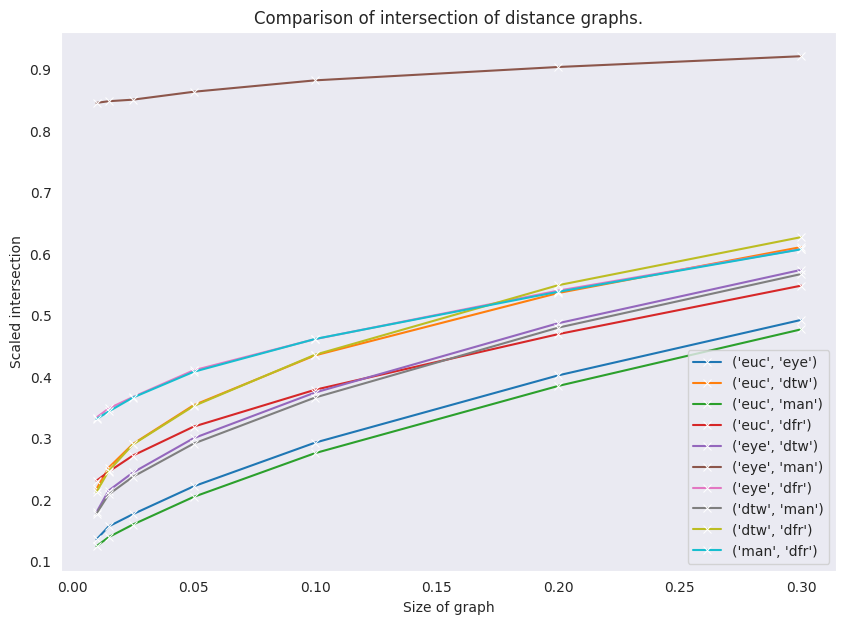

In [33]:
plot_inter(inter_matrices, sizes=SIZES)

`eye` и `man` сходу совпадают по набору ребер на $90\%$, что и ожидалось. Остальные пары ведут себя похоже.

### Community detection и модулярность

Зафиксируем `SIZES`. Для каждого `SIZES[i]` построим граф для каждой дистанции, запустим Лейдена и посчитаем модулярность.

In [34]:
Node        = Tuple[int, int]  # (participant_id, image_id)
Community   = List[Node]
Communities = List[Community]
Detection   = Tuple[nx.Graph, Communities]

In [35]:
def detect_communities(similarity_matrix: pd.DataFrame, size: float, mode: str = "louvain") -> Tuple[nx.Graph, Communities]:
    graph = make_graph_from_similarity(similarity_matrix, size=size)
    if mode == "louvain":
        communities = nx.community.louvain_communities(graph, weight="weight")
    elif mode == "leiden":
        graph_ig = ig.Graph.from_networkx(graph)
        communities = ig.Graph.community_leiden(graph_ig, objective_function="modularity", n_iterations=500).membership
        all_vs = []
        for v in graph_ig.vs:
            all_vs.append(v.attributes()['_nx_name'])
        communities_vs = list(zip(communities, all_vs))
        communities_dict = {}
        for elem in communities_vs:
            if elem[0] not in communities_dict:
                communities_dict[elem[0]] = {elem[1]}
            else:
                communities_dict[elem[0]].add(elem[1])
        communities = communities_dict.values()
    else:
        raise Exception("Mode must be either louvain, leiden")
    return graph, sorted([sorted(c) for c in communities])

def conduct_community_detection(
        similarity_matrices: Dict[str, pd.DataFrame], sizes: List[float], mode: str = "louvain"
) -> Dict[str, List[Detection]]:
    result = {}
    for dist_name, similarity_matrix in similarity_matrices.items():
        print(dist_name)
        result[dist_name] = [detect_communities(similarity_matrix, size, mode)
                             for size in sizes]
    return result

def plot_community_detection(result: Dict[str, List[Detection]], sizes: List[float]):
    fig, ax = plt.subplots(figsize=(10, 7))
    for dist_name, detections in result.items():
        modularities = [nx.community.modularity(graph, communities)
                        for (graph, communities) in detections]
        sns.lineplot(x=sizes, y=modularities, label=dist_name, ax=ax)
    ax.set(
        title="Community detection results",
        xlabel="Scaled size",
        ylabel="Modularity"
    )

Около минуты ждать.

In [36]:
result = conduct_community_detection(similarity_matrices, SIZES, mode="leiden")

euc
eye
dtw
man
dfr


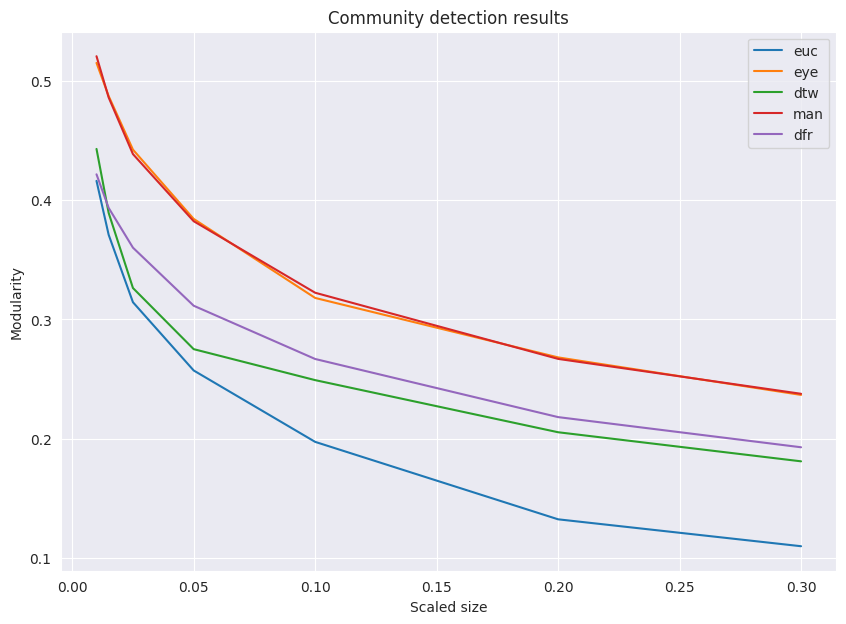

In [37]:
plot_community_detection(result, SIZES)

In [38]:
result = conduct_community_detection(similarity_matrices, SIZES, mode="louvain")

euc
eye
dtw
man
dfr


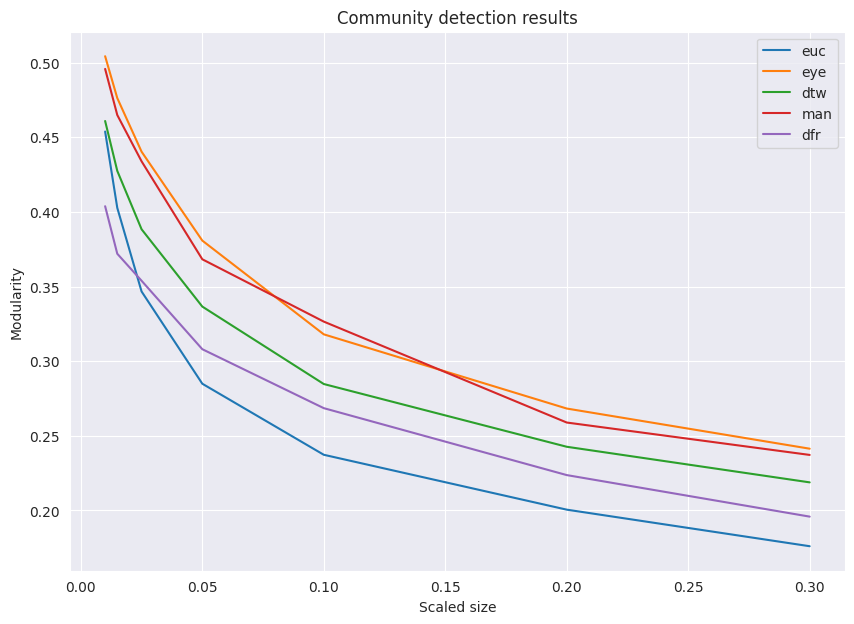

In [39]:
plot_community_detection(result, SIZES)

Получили, что `eye`/`man` лучше всего по модулярности, и это значение падает с увеличением размера графа, что также логично. В целом, 0.3 для >= 32k ребер пойдет.

### Интерпретация результатов

Посмотрим на однородность полученных community (в качестве определения однородности будем использовать Gini impurity).

In [40]:
def is_node_asd(df: pd.DataFrame, node: Node) -> bool:
    return df[(df["participant_id"] == node[0]) & (df["image_id"] == node[1])]["is_asd"].values[0]

def calc_gini(y: List[int]) -> float:
    labels = np.unique(y)
    gini_index = 1
    for label in labels:
        p = np.mean(y == label)
        gini_index -= p * p
    return gini_index

def calc_impurity(df: pd.DataFrame, community: Community) -> float:
    return calc_gini([int(is_node_asd(df, node)) for node in community])

def calc_weighted_impurity(df: pd.DataFrame, communities: Communities) -> float:
    weights  = np.array([len(c) for c in communities])
    impurity = np.array([calc_impurity(df, c) for c in communities])
    return np.sum(weights * impurity) / sum([len(c) for c in communities])

def plot_impurity_in_community_detection(df: pd.DataFrame, result: Dict[str, List[Detection]], sizes: List[float]):
    fig, ax = plt.subplots(figsize=(10, 7))
    
    for dist_name, detections in result.items():
        weighted_impurities = [calc_weighted_impurity(df, communities)
                               for (_, communities) in detections]
        sns.lineplot(x=sizes, y=weighted_impurities, label=dist_name, ax=ax)
    ax.set(
        title="Comparison of homogeneity (Gini impurity)",
        xlabel="Scaled size",
        ylabel="Homogeneity (Gini impurity)"
    )
    plt.show()

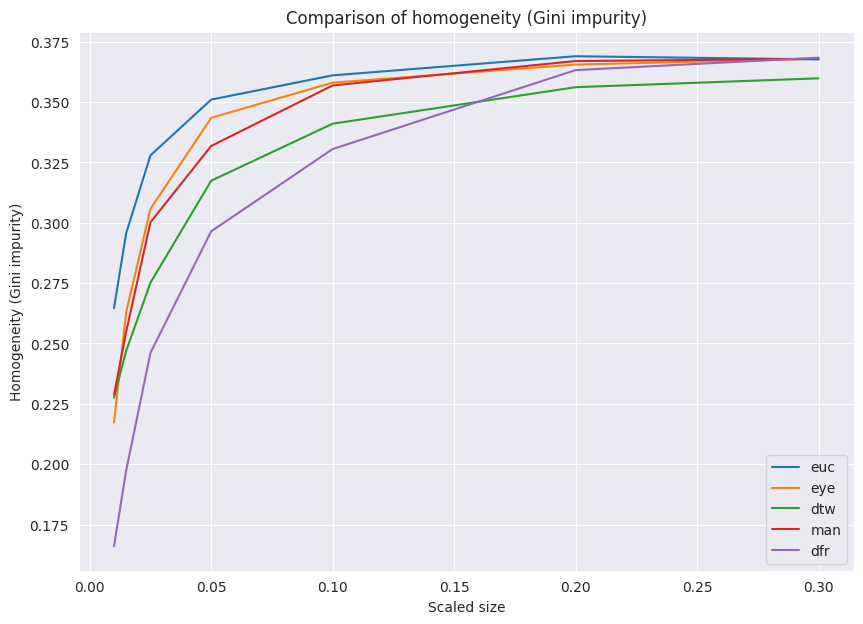

In [41]:
plot_impurity_in_community_detection(df, result, SIZES)

Выяснили, что `dtw` показывает наилучшую однородность communities. Посмотрим на конкретные community по этой дистанции для наименьших значений `Gini impurity`.

In [42]:
# def create_community_node_colors(graph: nx.Graph, communities: Communities) -> List[str]:
#     number_of_colors = len(communities)
#     colors = ["blue", "orange", "red", "olive", "green", "yellow", "brown",
#               "pink", "purple", "gray", "cyan", "darkgreen", "slateblue", "indigo"][:number_of_colors]
#     node_colors = []
#     for node in graph:
#         current_community_index = 0
#         for community in communities:
#             if node in community:
#                 node_colors.append(colors[current_community_index])
#                 break
#             current_community_index += 1
#     return node_colors
# 
# def show_communities(df: pd.DataFrame, result: Dict[str, List[Detection]], dist_name: str, idx: int):
#     detections = result[dist_name]
#     graph, communities = detections[idx]
#     comms_sort = sorted(communities, key=lambda x: len(x), reverse=True)
#     graph_ = graph.copy()
#     for community in comms_sort[5:]:
#         for node in community:
#             graph_.remove_node(node)
#     print(f"{len(communities)} communities")
#     
#     label_mapper = {}
#     for i, community in enumerate(comms_sort[:5]):
#         for node in community:
#             label_mapper[node] = i + 1
#     node_colors = create_community_node_colors(graph_, comms_sort[:5])
#     print(f"Max clique: {len(nx.approximation.max_clique(graph_))}")
#     pos = nx.spring_layout(graph_, scale=2)
#     print(f"Components: {nx.number_connected_components(graph)} Isolated: {nx.number_of_isolates(graph)}")
#     nx.draw(graph_, with_labels=True, pos=pos, labels=label_mapper,
#             node_color=node_colors
#             )

def create_community_node_colors(graph: nx.Graph, communities: Communities) -> List[str]:
    number_of_colors = len(communities)
    colors = ["blue", "orange", "red", "olive", "green", "yellow", "brown",
              "pink", "purple", "gray", "cyan", "darkgreen", "slateblue", "indigo"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

def show_communities(df: pd.DataFrame, result: Dict[str, List[Detection]], dist_name: str, idx: int):
    detections = result[dist_name]
    graph, communities = detections[idx]
    comps = nx.connected_components(graph)
    comps_sort = sorted(comps, key=lambda x: len(x), reverse=True)
    graph_ = graph.copy()
    for comp in comps_sort[1:]:
        for node in comp:
            graph_.remove_node(node)
    print(f"{len(communities)} communities")
    new_communities = []
    for community in communities:
        new_community = set()
        for node in community:
            if node in comps_sort[0]:
                new_community.add(node)
        if len(new_community) > 0:
            new_communities.append(new_community)
    label_mapper = {}
    for i, community in enumerate(new_communities):
        for node in community:
            label_mapper[node] = i + 1
      
    node_colors = create_community_node_colors(graph_, new_communities)
    print(f"Max clique: {len(nx.approximation.max_clique(graph_))}")
    pos = nx.spring_layout(graph_, scale=2)
    print(f"Components: {nx.number_connected_components(graph)} Isolated: {nx.number_of_isolates(graph)}")
    nx.draw(graph_, with_labels=True, pos=pos, labels=label_mapper,
            node_color=node_colors
            )

280 communities
Max clique: 11
Components: 276 Isolated: 272


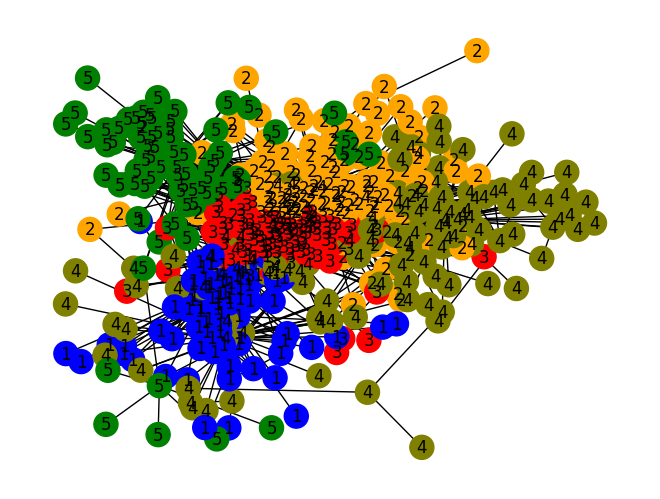

In [43]:
show_communities(df, result, "dtw", 0)

### Анализ графа и разбиения на коммьюнити

In [44]:
graph_nx, communities_nx = result["dtw"][1]

In [45]:
print(f"Number of the isolates: {nx.number_of_isolates(graph_nx)}")
print(f"Nuber of the connected components: {nx.number_connected_components(graph_nx)}")

Number of the isolates: 231
Nuber of the connected components: 233


### Однородность тегов в каждом community

In [46]:
from typing import Set
def extract_labels_in_community(communities: List[Set]) -> List[Dict]:
    community_labels = []
    for community in communities:
        count_of_label = {}
        count_of_asd = {"ASD": 0, "TD": 0}
        for node in community:
            is_asd = df[(df["participant_id"] == node[0]) & (df["image_id"] == node[1])]["is_asd"].values[0]
            labels = df[(df["participant_id"] == node[0]) & (df["image_id"] == node[1])]["labels"].values[0]
            if is_asd:
                count_of_asd["ASD"] += 1
            else:
                count_of_asd["TD"] += 1
            if "people" in labels:
                if "people" not in count_of_label:
                    count_of_label["people"] = 0
                count_of_label["people"] += 1
            elif "animal" in labels:
                if "animal" not in count_of_label:
                    count_of_label["animal"] = 0
                count_of_label["animal"] += 1
            elif "text" in labels:
                if "text" not in count_of_label:
                    count_of_label["text"] = 0
                count_of_label["text"] += 1
            else:
                if "object" not in count_of_label:
                    count_of_label["object"] = 0
                count_of_label["object"] += 1
        for label in count_of_label.keys():
            count_of_label[label] /= len(community)
        count_of_asd["ASD"] /= len(community)
        count_of_asd["TD"] /= len(community)
        community_labels.append({"label": count_of_label, "asd": count_of_asd})
    return community_labels

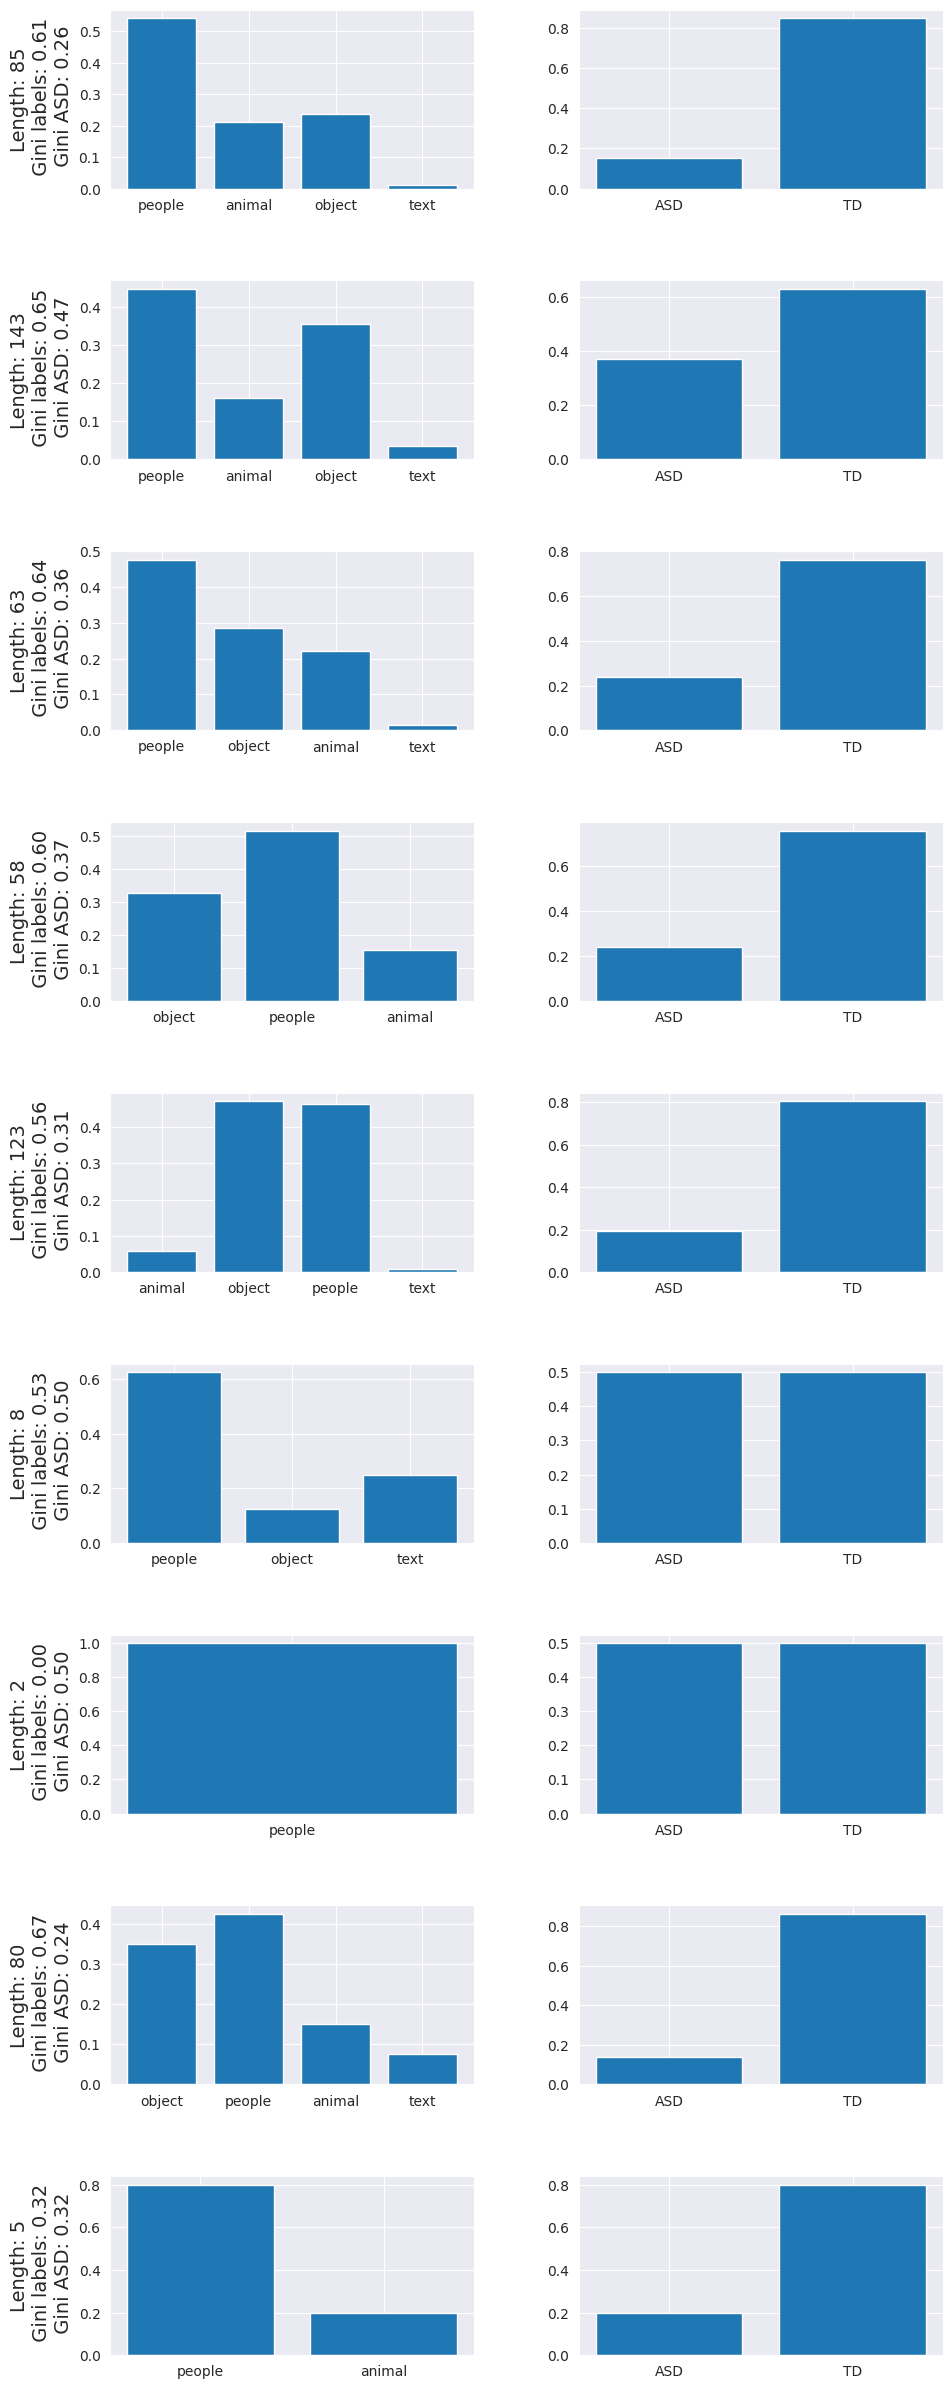

In [47]:
without_isolated_nodes = [x for x in communities_nx if len(x) > 1]
community_labels = extract_labels_in_community(communities_nx)

fig, axes = plt.subplots(nrows=len(without_isolated_nodes), ncols=2, figsize=(10, 25))
fig.tight_layout(pad=4.5)

axes_ind = 0
for ind, community in enumerate(community_labels):
    if len(communities_nx[ind]) > 1:
        axes[axes_ind][0].bar(x=[str(x) for x in community["label"].keys()], height=community["label"].values())
        axes[axes_ind][1].bar(x=[str(x) for x in community["asd"].keys()], height=community["asd"].values())
        axes[axes_ind][0].set_ylabel(f"Length: {len(communities_nx[ind])}\n Gini labels: {1 - np.power(np.array(list(community["label"].values())), 2).sum():.2f}\n Gini ASD: {1 - np.power(np.array(list(community["asd"].values())), 2).sum():.2f}", fontsize=14)
        axes_ind += 1
plt.show()

In [48]:
for ind, community in enumerate(community_labels):
    if len(communities_nx[ind]) > 1:
        print(f"Community {ind}")
        print(f"Gini for labels: {1 - np.power(np.array(list(community["label"].values())), 2).sum()}")
        print(f"Gini for ASD: {1 - np.power(np.array(list(community["asd"].values())), 2).sum()}")

Community 0
Gini for labels: 0.6067820069204153
Gini for ASD: 0.25910034602076126
Community 28
Gini for labels: 0.6454105335224216
Gini for ASD: 0.46652648051249446
Community 34
Gini for labels: 0.6419753086419753
Gini for ASD: 0.36281179138322006
Community 50
Gini for labels: 0.6010701545778834
Gini for ASD: 0.3662306777645661
Community 56
Gini for labels: 0.5595875470949832
Gini for ASD: 0.3140987507436048
Community 69
Gini for labels: 0.53125
Gini for ASD: 0.5
Community 76
Gini for labels: 0.0
Gini for ASD: 0.5
Community 124
Gini for labels: 0.66875
Gini for ASD: 0.23718749999999988
Community 216
Gini for labels: 0.31999999999999984
Gini for ASD: 0.31999999999999984


Видно, что community не имеют какой-либо однородности отдон

### Однородность в максимальной клике

In [49]:
max_clique = nx.approximation.max_clique(graph_nx)
clique_labels = extract_labels_in_community([set(max_clique)])[0]

Text(0, 0.5, 'Length: 13')

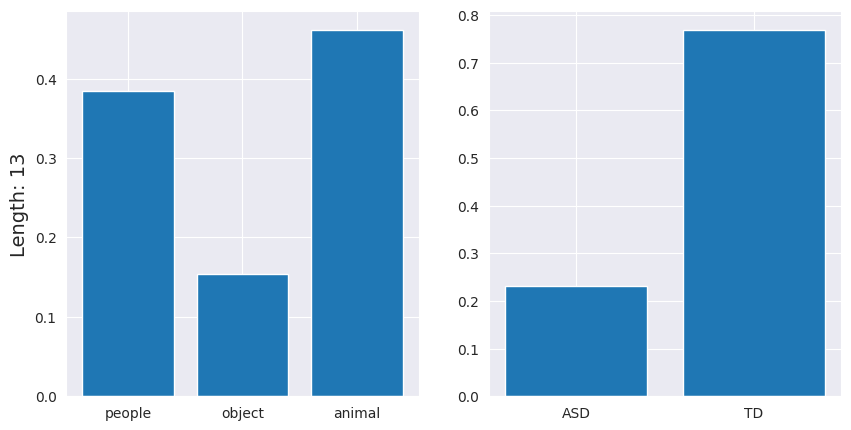

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].bar(x=[str(x) for x in clique_labels["label"].keys()], height=clique_labels["label"].values())
axes[1].bar(x=[str(x) for x in clique_labels["asd"].keys()], height=clique_labels["asd"].values())
axes[0].set_ylabel(f"Length: {len(max_clique)}", fontsize=14)

### Simrank

In [51]:
simrank = nx.simrank_similarity(graph_nx)

In [52]:
all_similar = dict()
count = 0
for u in simrank.keys():
    for v in simrank[u].keys():
        if simrank[u][v] >= 0.75 and u != v and not ((u in all_similar and v in all_similar[u]) or (v in all_similar and u in all_similar[v])):
            count += 1
            if u not in all_similar:
                all_similar[u] = []
            all_similar[u].append(v)

In [53]:
count

93

In [54]:
c = 0
for u in all_similar:
    for v in all_similar[u]:
        if df[(df["participant_id"] == u[0]) & (df["image_id"] == u[1])]["is_asd"].values[0] == df[(df["participant_id"] == v[0]) & (df["image_id"] == v[1])]["is_asd"].values[0]:
            c += 1
print(c / count)

0.6666666666666666


In [55]:
for u in all_similar:
    for v in all_similar[u]:
        print(f"Node u: {u}")
        print(f"Has ASD: {df[(df["participant_id"] == u[0]) & (df["image_id"] == u[1])]["is_asd"].values[0]}")
        print(f"Labels: {df[(df["participant_id"] == u[0]) & (df["image_id"] == u[1])]["labels"].values[0]}")
        print(f"Node v: {v}")
        print(f"Has ASD: {df[(df["participant_id"] == v[0]) & (df["image_id"] == v[1])]["is_asd"].values[0]}")
        print(f"Labels: {df[(df["participant_id"] == v[0]) & (df["image_id"] == v[1])]["labels"].values[0]}")
        print(f"Similarity: {simrank[u][v]}")
        print()

Node u: (1, 185)
Has ASD: False
Labels: {'object'}
Node v: (1, 200)
Has ASD: False
Labels: {'object', 'people'}
Similarity: 0.9

Node u: (1, 185)
Has ASD: False
Labels: {'object'}
Node v: (1, 274)
Has ASD: False
Labels: {'people', 'object'}
Similarity: 0.9

Node u: (1, 185)
Has ASD: False
Labels: {'object'}
Node v: (2, 7)
Has ASD: True
Labels: {'people'}
Similarity: 0.9

Node u: (1, 200)
Has ASD: False
Labels: {'object', 'people'}
Node v: (1, 274)
Has ASD: False
Labels: {'people', 'object'}
Similarity: 0.9

Node u: (1, 200)
Has ASD: False
Labels: {'object', 'people'}
Node v: (2, 7)
Has ASD: True
Labels: {'people'}
Similarity: 0.9

Node u: (1, 240)
Has ASD: False
Labels: {'people'}
Node v: (2, 108)
Has ASD: False
Labels: {'people'}
Similarity: 0.9

Node u: (1, 240)
Has ASD: False
Labels: {'people'}
Node v: (2, 121)
Has ASD: False
Labels: {'people'}
Similarity: 0.9

Node u: (1, 274)
Has ASD: False
Labels: {'people', 'object'}
Node v: (2, 7)
Has ASD: True
Labels: {'people'}
Similarity: 0.

### Другие характеристики графа

In [56]:
isolated = [x for x in nx.isolates(graph_nx)]
connected_graph_nx = graph_nx.copy()
for node in isolated:
    connected_graph_nx.remove_node(node)

In [57]:
connected_graph_nx = graph_nx.copy()
components = nx.connected_components(connected_graph_nx)
components = sorted(components, key=lambda x: len(x), reverse=True)
for comp in components[1:]:
    for node in comp:
        connected_graph_nx.remove_node(node)

In [58]:
print(f"Size of the maximal independent set: {len(nx.maximal_independent_set(graph_nx))}")
print(f"Size of the max clique {len(nx.approximation.max_clique(graph_nx))}")

Size of the maximal independent set: 519
Size of the max clique 13


In [64]:
print(f"Non-randomness: {nx.non_randomness(connected_graph_nx)}")

Non-randomness: (1.0651996392483944, -80.2128030811965)


In [65]:
print(f"Barycenter: {nx.barycenter(connected_graph_nx)}")

Barycenter: [(5, 181)]


In [66]:
print(f"Has ASD: {df[(df["participant_id"] == 2) & (df["image_id"] == 148)]["is_asd"].values[0]}")
print(f"Labels: {df[(df["participant_id"] == 2) & (df["image_id"] == 148)]["labels"].values[0]}")

Has ASD: True
Labels: {'animal'}


In [67]:
print(f"Ration of the centers to the number of vertices: {len(nx.center(connected_graph_nx)) / connected_graph_nx.number_of_nodes()}")

Ration of the centers to the number of vertices: 0.2513274336283186


In [68]:
nx.radius(connected_graph_nx)

6

In [69]:
nx.diameter(connected_graph_nx)

10

In [63]:
# print(f"{len(without_isolated_nodes)} communities")
# 
# label_mapper = {}
# for i, community in enumerate(without_isolated_nodes):
#     for node in community:
#         label_mapper[node] = i + 1
# node_colors = create_community_node_colors(connected_graph_nx, without_isolated_nodes)
# pos = nx.spring_layout(connected_graph_nx, scale=25)
# nx.draw(connected_graph_nx, with_labels=True, pos=pos, labels=label_mapper,
#         node_color=node_colors
#         )